by Yigao Li

# Exercise 1

In [11]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()

# Parameters for the data
dim_data = 30
num_labels = 2
num_examples = 569

# Parameters for training
learning_rate = 1e-6
num_train = 400

X = data['data'] # Data in rows
targets = data.target # 0-1 labels
labels = np.zeros((num_examples, num_labels))
for i in range(num_examples):
    labels[i,targets[i]]=1 # Conversion to one-hot representations

def logit(x):
    return 1/(1+np.exp(-x))

def loglogit(x):
    return np.log(1+np.exp(-x))
    
def loglogitlikelihood(X,y):
    tildeX = np.hstack([np.ones((X.shape[0],1)), X])
    f = lambda b: np.mean(loglogit(np.multiply(y, tildeX@b)))
    df = lambda b: -tildeX.T @ np.multiply(y, logit(-np.multiply(y, tildeX@b))) / X.shape[0]
    d2f = lambda b: tildeX.T @ np.diag(logit(tildeX@b)*logit(-tildeX@b)) @ tildeX / X.shape[0]
    return f, df, d2f

def lr_accuracy(b, X, targets):
    tildeX = np.hstack([np.ones((X.shape[0],1)), X])
    y_guess = np.zeros(X.shape[0])
    y_guess[logit(tildeX@b) > 0.5] = 1
    return np.mean(np.equal(targets, y_guess))

def backtracking(x0, dx, f, df0, alpha=0.1, beta=0.5, verbose=False):
    '''
    Backtracking for general functions with illustrations
    :param x0: Previous point from backtracking, or initial guess
    :param dx: Incremental factor for updating x0
    :param f: Objective function
    :param df0: Gradient of f at x0
    :param alpha: Sloping factor of stopping criterion
    :param beta: "Agressiveness" parameter for backtracking steps
    :param verbose: Boolean for providing plots and data
    :return: x1, the next iterate in backtracking
    '''

    # Note that the definition below requires that dx and df0 have the same shape
    delta = alpha * np.sum(dx * df0) # A general, but memory intensive inner product
    
    t = 1 # Initialize t=beta^0
    f0 = f(x0) # Evaluate for future use
    x = x0 + dx # Initialize x_{0, inner}
    fx = f(x)
    
    if verbose:
        n=0
        xs = [x]
        fs = [fx]
        ts = [1] * 3
    
    while (not np.isfinite(fx)) or f0 + delta * t < fx:
        t = beta * t
        x = x0 + t * dx
        fx = f(x)
    ###################################### 
    
        if verbose:
            n += 1
            xs.append(x)
            fs.append(fx)
            ts.append(t)
            ts.pop(0)
            
    if verbose:
        # Display the function along the line search direction as a function of t
        s = np.linspace(-0.1*ts[-1], 1.1*ts[0], 100)
        xi = [0, 1.1*ts[0]]
        fxi = [f0, f0 + 1.1*ts[0]*delta]   
        y = np.zeros(len(s))
        
        for i in range(len(s)):
            y[i] = f(x0 + s[i]*dx) # Slow for vectorized functions

        plt.figure('Backtracking illustration')
        arm, =plt.plot(xi, fxi, '--', label='Armijo Criterion')
        fcn, =plt.plot(s, y, label='Objective Function')
        plt.plot([s[0], s[-1]], [0, 0], 'k--')
        pts =plt.scatter(ts, [0 for p in ts],
                         label='Backtracking points for n=%d, %d, %d' % (n, n+1, n+2))
        plt.scatter(ts, [f(x0 + q*dx) for q in ts],
                    label='Backtracking values for n=%d, %d, %d' % (n, n+1, n+2))
        init =plt.scatter([0], [f0], color='black', label='Initial point')
        plt.xlabel('$t$')
        plt.ylabel('$f(x^{(k)}+t\Delta x^{(k+1)})$')
        plt.legend(handles=[arm, fcn, pts, init])
        plt.show()
        
        return x, xs, fs
    
    else:
        return x
    
y = 2*targets-1
f, df, d2f = loglogitlikelihood(X[:400,:], y[:400])
b = np.zeros(dim_data+1)
for i in range(1000):
#    if ((i % 10) == 0):
#        acc = lr_accuracy(b, X[:400,:], targets[:400])
#        val = f(b)
#        print('LR Step %d: training_accuracy %g, cross entropy %g' % (i, acc, val))
#        print('Gradient SS: %g' % np.sum(df(b)**2))
    b = backtracking(b, -np.linalg.solve(d2f(b), df(b)), f, df(b))
acc = lr_accuracy(b, X[:400,:], targets[:400])
val = f(b)
print('LR Step %d: training_accuracy %g, cross entropy %g' % (1000, acc, val))
print('Gradient SS: %g' % np.sum(df(b)**2))

print("LR test accuracy: %g" % lr_accuracy(b, X[400:, :], targets[400:]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


LR Step 1000: training_accuracy 1, cross entropy 0
Gradient SS: 3.09717e-35
LR test accuracy: 0.928994


# Exercise 2
(a) $\mathcal{F}$ is a 3 by 2 matrix, which is a 2nd order tensor.  
(b)
$$\begin{aligned}
f_{1,1}&=\sum_{k_1=1}^2\sum_{k_2=1}^2a_{1,k_1,k_2,1}b_{k_1,k_2}=a_{1,1,1,1}b_{1,1}+a_{1,1,2,1}b_{1,2}+a_{1,2,1,1}b_{2,1}+a_{1,2,2,1}b_{2,2}\\
&=1\times1+(-2)\times(-1)+1\times(-2)+(-2)\times2=1+2-2-4=-3\\
\end{aligned}$$
$$\begin{aligned}
f_{1,2}&=\sum_{k_1=1}^2\sum_{k_2=1}^2a_{1,k_1,k_2,2}b_{k_1,k_2}=a_{1,1,1,2}b_{1,1}+a_{1,1,2,2}b_{1,2}+a_{1,2,1,2}b_{2,1}+a_{1,2,2,2}b_{2,2}\\
&=(-1)\times1+1\times(-1)+1\times(-2)+2\times2=-1-1-2+4=0\\
\end{aligned}$$
$$\begin{aligned}
f_{2,1}&=\sum_{k_1=1}^2\sum_{k_2=1}^2a_{1,k_1,k_2,1}b_{k_1,k_2}=a_{2,1,1,1}b_{1,1}+a_{2,1,2,1}b_{1,2}+a_{2,2,1,1}b_{2,1}+a_{2,2,2,1}b_{2,2}\\
&=2\times1+(-1)\times(-1)+2\times(-2)+1\times2=2+1-4+2=1\\
\end{aligned}$$
$$\begin{aligned}
f_{2,2}&=\sum_{k_1=1}^2\sum_{k_2=1}^2a_{1,k_1,k_2,1}b_{k_1,k_2}=a_{2,1,1,2}b_{1,1}+a_{2,1,2,2}b_{1,2}+a_{2,2,1,2}b_{2,1}+a_{2,2,2,2}b_{2,2}\\
&=(-1)\times1+1\times(-1)+1\times(-2)+2\times2=-1-1-2+4=0\\
\end{aligned}$$
$$\begin{aligned}
f_{3,1}&=\sum_{k_1=1}^2\sum_{k_2=1}^2a_{1,k_1,k_2,1}b_{k_1,k_2}=a_{3,1,1,1}b_{1,1}+a_{3,1,2,1}b_{1,2}+a_{3,2,1,1}b_{2,1}+a_{3,2,2,1}b_{2,2}\\
&=1\times1+(-2)\times(-1)+1\times(-2)+(-1)\times2=1+2-2-2=-1\\
\end{aligned}$$
$$\begin{aligned}
f_{3,2}&=\sum_{k_1=1}^2\sum_{k_2=1}^2a_{1,k_1,k_2,1}b_{k_1,k_2}=a_{3,1,1,2}b_{1,1}+a_{3,1,2,2}b_{1,2}+a_{3,2,1,2}b_{2,1}+a_{3,2,2,2}b_{2,2}\\
&=(-2)\times1+1\times(-1)+1\times(-2)+1\times2=-2-1-2+2=-3\\
\end{aligned}$$
Therefore, $\mathcal{F}=\begin{pmatrix}-3&&0\\1&&0\\-1&&-3\end{pmatrix}$

In [2]:
import tensorflow as tf

A = tf.Variable([[[[1,-1],[-2,1]], [[1,1],[-2,2]]], [[[2,-1],[-1,1]], [[2,1],[1,2]]],
                 [[[1,-2],[-2,1]], [[1,1],[-1,1]]]], name = 'A')
B = tf.Variable([[1,-1],[-2,2]], name = 'B')
f = tf.tensordot(A, B, [[1,2],[0,1]])
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    result = f.eval()
print(result)

[[-3  0]
 [ 1  0]
 [-1 -3]]


# Exercise 3
(a)

In [102]:
import pandas as pd
df = pd.read_table("Caterpillars.txt", index_col = False)
df = df.dropna()
print("Dataset has %d records and each record has %d fields" % (len(df),
                                                                len(df.columns)))

Dataset has 253 records and each record has 18 fields


(b) Instar

[ 40.  40.  45.  64.  64.]


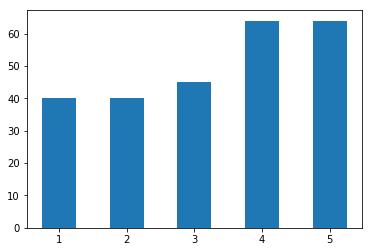

In [104]:
n, bins, patches = plt.hist(df["Instar"], bins = [1,2,3,4,5,6], align = "left",
                            rwidth = 0.5)
print(n)
plt.show()

ActiveFeeding

Y    179
N     74
Name: ActiveFeeding, dtype: int64


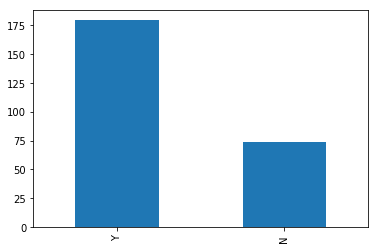

In [105]:
print(df["ActiveFeeding"].value_counts())
df["ActiveFeeding"].value_counts().plot(kind = "bar")
plt.show()

Fgp

Y    169
N     84
Name: Fgp, dtype: int64


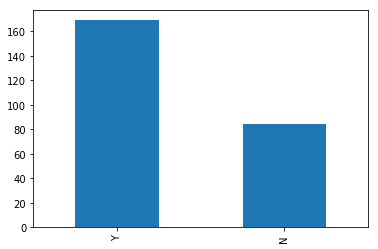

In [106]:
print(df["Fgp"].value_counts())
df["Fgp"].value_counts().plot(kind = "bar")
plt.show()

Mgp

N    171
Y     82
Name: Mgp, dtype: int64


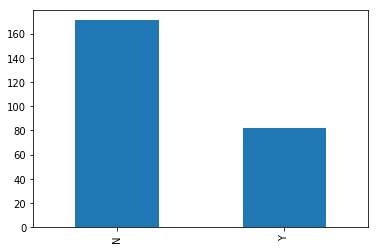

In [107]:
print(df["Mgp"].value_counts())
df["Mgp"].value_counts().plot(kind = "bar")
plt.show()

Mass

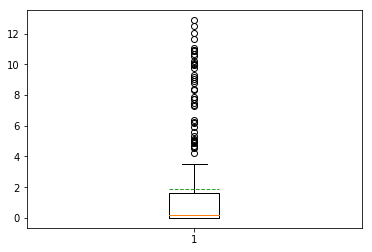

count    253.000000
mean       1.858916
std        3.175154
min        0.000994
25%        0.026300
50%        0.202300
75%        1.612200
max       12.863200
Name: Mass, dtype: float64

In [108]:
plt.boxplot(df["Mass"], meanline = True, showmeans = True)
plt.show()
df["Mass"].describe()

LogMass

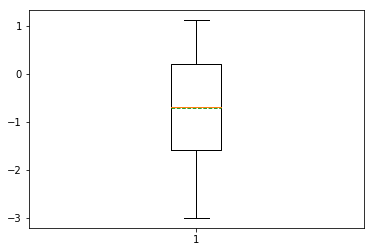

count    253.000000
mean      -0.718232
std        1.182963
min       -3.002614
25%       -1.580044
50%       -0.694004
75%        0.207419
max        1.109349
Name: LogMass, dtype: float64

In [111]:
plt.boxplot(df["LogMass"], meanline = True, showmeans = True)
plt.show()
df["LogMass"].describe()

Intake

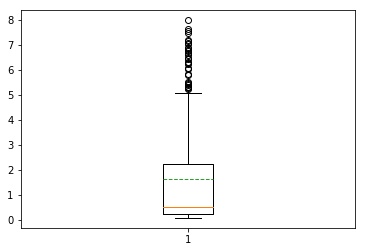

count    253.000000
mean       1.653889
std        2.122490
min        0.080799
25%        0.248736
50%        0.506300
75%        2.231200
max        7.972300
Name: Intake, dtype: float64

In [112]:
plt.boxplot(df["Intake"], meanline = True, showmeans = True)
plt.show()
df["Intake"].describe()

LogIntake

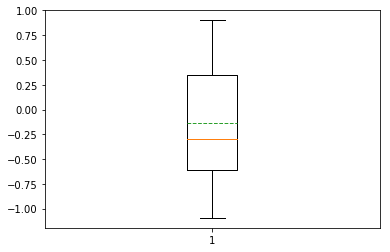

count    253.000000
mean      -0.134709
std        0.557257
min       -1.092594
25%       -0.604261
50%       -0.295592
75%        0.348539
max        0.901584
Name: LogIntake, dtype: float64

In [113]:
plt.boxplot(df["LogIntake"], meanline = True, showmeans = True)
plt.show()
df["LogIntake"].describe()

WetFrass

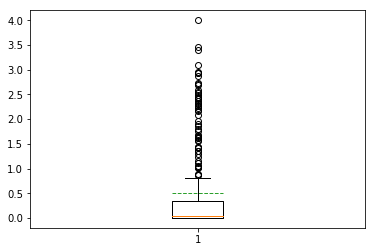

count    253.000000
mean       0.496783
std        0.881358
min        0.000051
25%        0.002213
50%        0.034900
75%        0.337700
max        4.001400
Name: WetFrass, dtype: float64

In [114]:
plt.boxplot(df["WetFrass"], meanline = True, showmeans = True)
plt.show()
df["WetFrass"].describe()

LogWetFrass

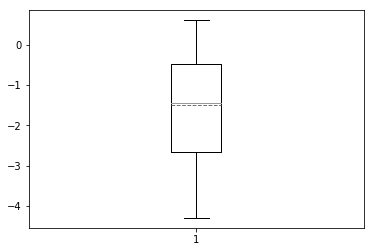

count    253.000000
mean      -1.488079
std        1.302561
min       -4.292430
25%       -2.655019
50%       -1.457175
75%       -0.471469
max        0.602212
Name: LogWetFrass, dtype: float64

In [115]:
plt.boxplot(df["LogWetFrass"], meanline = True, showmeans = True)
plt.show()
df["LogWetFrass"].describe()

DryFress

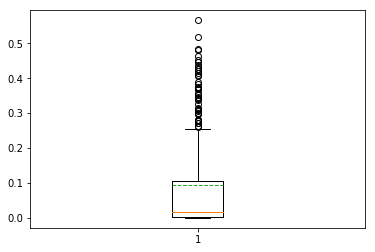

count    253.000000
mean       0.095467
std        0.142436
min        0.000049
25%        0.001748
50%        0.016100
75%        0.104300
max        0.565800
Name: DryFrass, dtype: float64

In [116]:
plt.boxplot(df["DryFrass"], meanline = True, showmeans = True)
plt.show()
df["DryFrass"].describe()

LogDryFrass

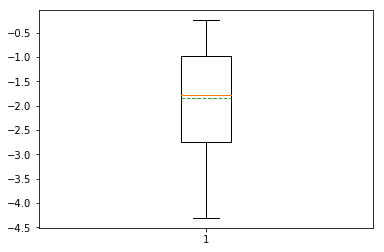

count    253.000000
mean      -1.852648
std        1.069799
min       -4.309804
25%       -2.757459
50%       -1.793174
75%       -0.981716
max       -0.247337
Name: LogDryFrass, dtype: float64

In [117]:
plt.boxplot(df["LogDryFrass"], meanline = True, showmeans = True)
plt.show()
df["LogDryFrass"].describe()

Cassim

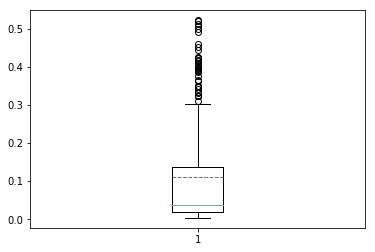

count    253.000000
mean       0.109715
std        0.136555
min        0.003327
25%        0.020038
50%        0.038229
75%        0.135825
max        0.522378
Name: Cassim, dtype: float64

In [118]:
plt.boxplot(df["Cassim"], meanline = True, showmeans = True)
plt.show()
df["Cassim"].describe()

LogCassim

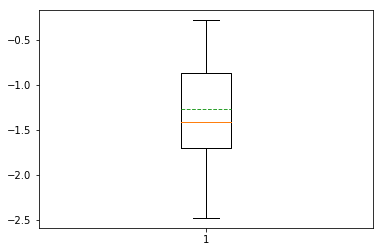

count    253.000000
mean      -1.269240
std        0.515786
min       -2.477917
25%       -1.698142
50%       -1.417606
75%       -0.867019
max       -0.282015
Name: LogCassim, dtype: float64

In [119]:
plt.boxplot(df["LogCassim"], meanline = True, showmeans = True)
plt.show()
df["LogCassim"].describe()

NFrass

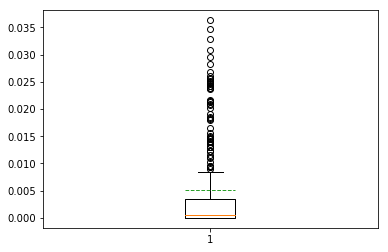

count    253.000000
mean       0.005085
std        0.008587
min        0.000001
25%        0.000053
50%        0.000503
75%        0.003471
max        0.036323
Name: Nfrass, dtype: float64

In [121]:
plt.boxplot(df["Nfrass"], meanline = True, showmeans = True)
plt.show()
df["Nfrass"].describe()

LogNfrass

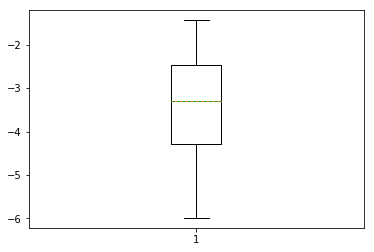

count    253.000000
mean      -3.301616
std        1.166009
min       -5.986783
25%       -4.276312
50%       -3.298449
75%       -2.459527
max       -1.439824
Name: LogNfrass, dtype: float64

In [122]:
plt.boxplot(df["LogNfrass"], meanline = True, showmeans = True)
plt.show()
df["LogNfrass"].describe()

Nassim

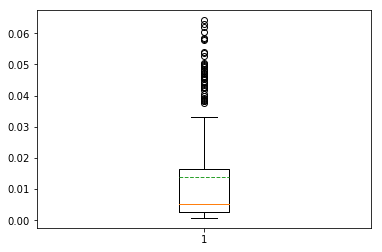

count    253.000000
mean       0.013831
std        0.016604
min        0.000768
25%        0.002617
50%        0.005196
75%        0.016332
max        0.064162
Name: Nassim, dtype: float64

In [123]:
plt.boxplot(df["Nassim"], meanline = True, showmeans = True)
plt.show()
df["Nassim"].describe()

LogNassim

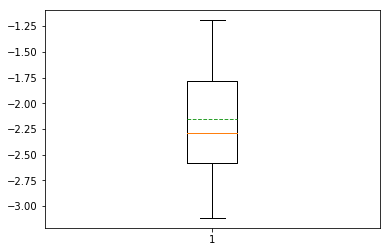

count    253.000000
mean      -2.153812
std        0.504872
min       -3.114898
25%       -2.582218
50%       -2.284320
75%       -1.786955
max       -1.192719
Name: LogNassim, dtype: float64

In [124]:
plt.boxplot(df["LogNassim"], meanline = True, showmeans = True)
plt.show()
df["LogNassim"].describe()

(c) Generate matrix of scatter plots for all log-valued columns (7)

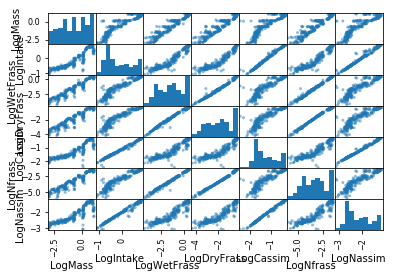

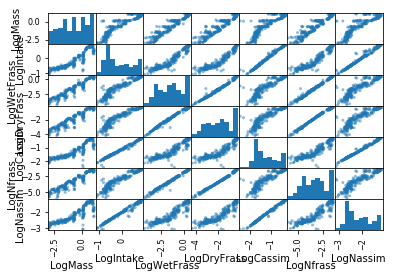

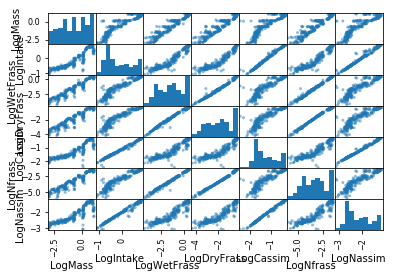

In [130]:
from pandas.plotting import scatter_matrix
df = df[["LogMass", "LogIntake", "LogWetFrass", "LogDryFrass", "LogCassim",
         "LogNfrass", "LogNassim"]]
scatter_matrix(df)